# Clasification

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_classification

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

# Import validation
from sklearn.model_selection import train_test_split

(1000, 2) (1000,) (800, 2) (800,) (200, 2) (200,)


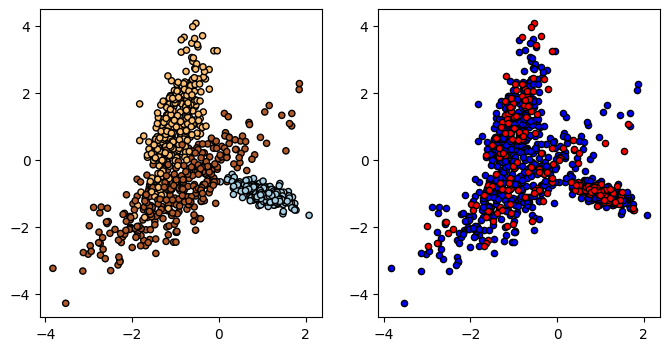

In [ ]:
# we create 100 separable points
X, y = make_classification(n_samples = 1000, n_features=2, n_classes = 3, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=7)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print(X.shape,y.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape)

# Plot train / test data
_ , axes=plt.subplots(1,2,figsize=(8,4))
axes[0].scatter(X[:,0], X[:,1],c = y,s=20,edgecolors='k',cmap='Paired')

#dibujar los train y test
axes[1].scatter(X_train[:,0],X_train[:,1], c='b',s=20,edgecolors='k')
axes[1].scatter(X_test[:,0],X_test[:,1],c='r',s=20,edgecolors='k')


In [ ]:
'''
    --> Paste your plot_2d_decision_boundaries function here!
'''
#import sys
#sys.path.append('/content/drive/MyDrive/Collab/Machine_Learning_Python/machine_learning')
#from Tools.utils import plot_decision_boundaries

def plot_decision_boundaries(model, X, y):
    # Paso 1: Determinar mínimo y máximo para los ejes
    h_min, h_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    v_min, v_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Paso 2: Crear la cuadrícula o grid
    h_grid, v_grid = np.meshgrid(np.linspace(h_min, h_max, 200), np.linspace(v_min, v_max, 200))

    # Paso 3: Calcular predicciones para cada punto en la cuadrícula
    pred_grid = model.predict(np.c_[h_grid.ravel(), v_grid.ravel()])

    # Paso 4: Cambiar el tamaño de las predicciones para que coincida con la cuadrícula
    pred_grid = pred_grid.reshape(h_grid.shape)

    # Paso 5: Crear el gráfico de la cuadrícula
    _, ax = plt.subplots(figsize=(5, 4))
    ax.pcolormesh(h_grid, v_grid, pred_grid, cmap='Paired')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='Paired')

    # Eliminar números en los ejes
    ax.set_xticks([])
    ax.set_yticks([])

    # Mostrar el gráfico
    plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


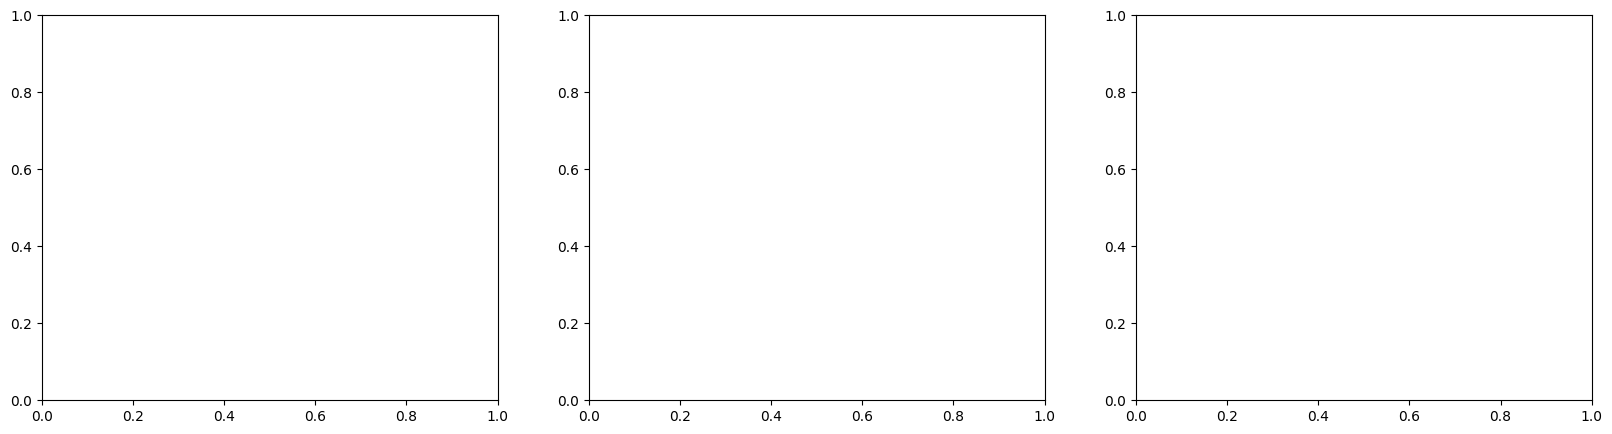

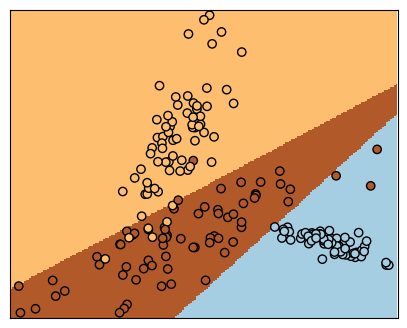

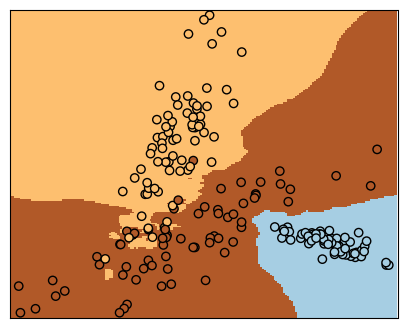

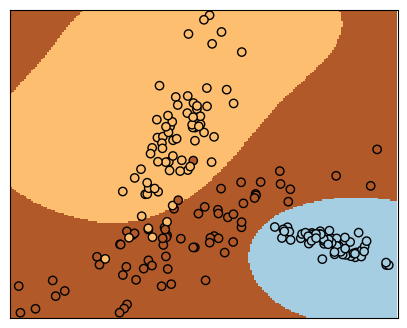

In [ ]:
models = [ LogisticRegression() , kNN(n_neighbors=3) , SVC(kernel='rbf') ]
names= ['Log Regression', 'k=3 NN', 'SVM(RBF)']
_, axes = plt.subplots(1,3, figsize = (20,5))
predictions = {}

# fit the models
for name, clf in zip(names,models) :
    #
    clf.fit(X_train, y_train)
    predictions[name]=clf.predict(X_test)

    # Plot everything
    plot_decision_boundaries(clf, X_test, y_test)
    #ax.set_title(name)

plt.show()

## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

########----- Results for Log Regression -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.940  	   0.940  	   0.940  	   0.940  	
########----- Results for k=3 NN -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.960  	   0.960  	   0.960  	   0.960  	
########----- Results for SVM(RBF) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.955  	   0.955  	   0.955  	   0.955  	


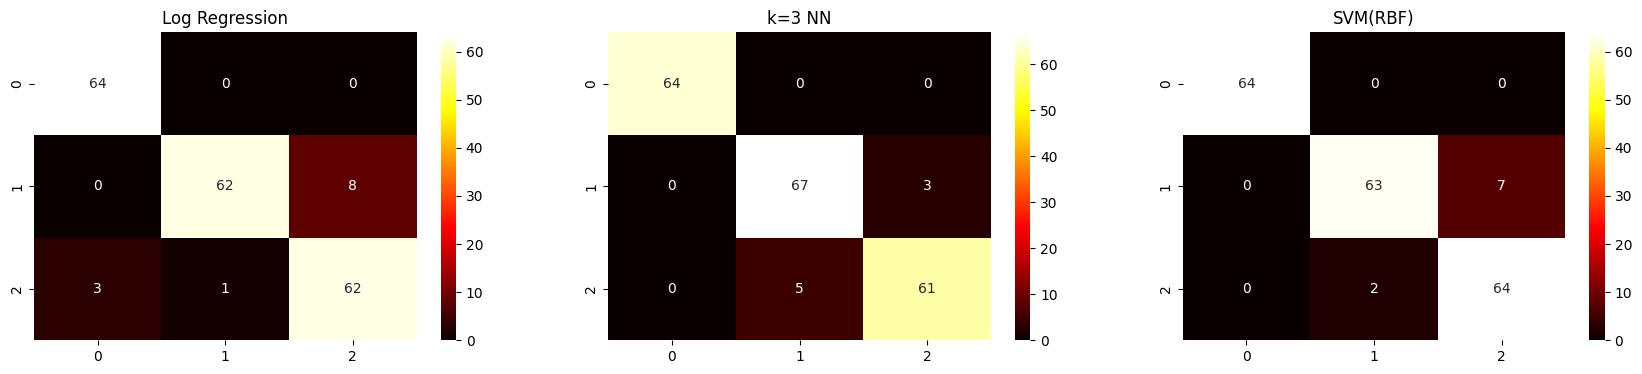

In [ ]:
_, axes = plt.subplots(1, 3 , figsize = (21,4))

# Compute metrics - plot confusion matrix
for name,ax in zip(names,axes) :
  print ("########----- Results for {0} -----########".format( name ))
  accuracy = accuracy_score( y_test , predictions[name] )
  precision = precision_score( y_test , predictions[name] , average = "micro")
  recall = recall_score( y_test , predictions[name] , average = "micro")
  f1 = f1_score( y_test , predictions[name] , average = "micro")
  cm = confusion_matrix( y_test , predictions[name] )
  ##--------------
  print("-- Acc --\t -- Prec --\t -- Rec --\t -- F1 --  ")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t   {3:.3f}  \t".format(accuracy, precision, recall, f1))
  sns.heatmap(cm, cmap = "hot", annot = True, ax = ax )
  ax.set_title( name )


## En datos reales

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

(1797, 64)


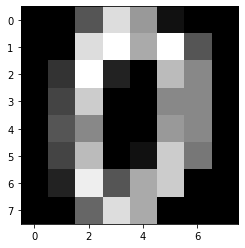

In [ ]:
digits = load_digits()
print(digits.data.shape)

plt.imshow(digits.images[0].reshape(8,8), cmap="gray")

Evalúe los distintos algoritmos entrenando con esta base de datos.

# Regression

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_regression

# import classifiers
from sklearn.linear_model import LinearRegression

# Import validation
from sklearn.model_selection import train_test_split

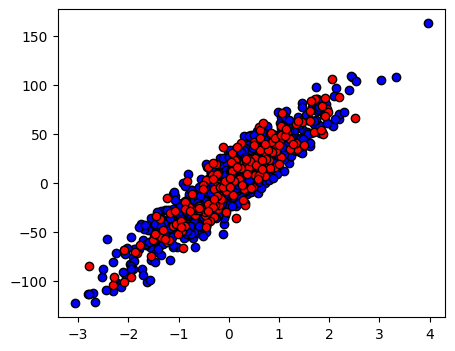

In [ ]:
X, y = make_regression(n_samples = 1000, n_features = 1 , noise = 15 , random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


#np.random.seed(0)
#y_test = y_test + np.random.normal(len(y_test)) * 0.1

# Plot train / test data
_, ax= plt.subplots(figsize=(5,4))
ax.scatter(X_train,y_train, c='b',edgecolors= 'k')
ax.scatter(X_test,y_test, c='r',edgecolors ='k')

In [ ]:
# Train a linear regression
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)


LinearRegression()

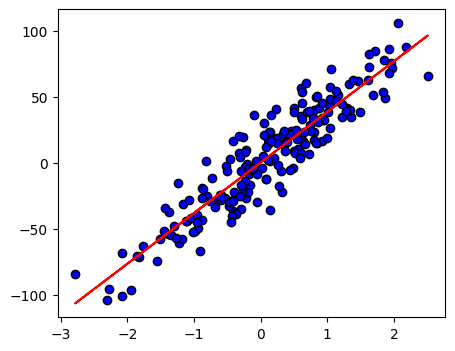

In [ ]:
predictions = linear_regression.predict(X_test)

#sactter de test
_, ax = plt.subplots(figsize=(5,4))
ax.scatter(X_test, y_test, c='b', edgecolors='k')

#la linea de regresion
ax.plot(X_test, predictions, c='r')

## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Compute MAE and MSE
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print('MAE: {0:0.4f}'.format(mae)) #diferencia absoluta
print('MSE: {0:0.4f}'.format(mse)) #diferencia cuadrada

MAE: 12.2933
MSE: 236.1130
